# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name=r"Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

###  Setup environment

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

### Train the agent

In [6]:
def ddpg():
    total_episodes = 2000
    update_freq=10
    print_freq=100
    max_t=1000
    scores_deque = deque(maxlen=print_freq)
    scores = []
    max_score = -np.Inf
    i=0
    for i_episode in range(1, total_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations 

        agent.reset()
        agent_scores = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states, add_noise=False)      
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards                         
            dones = env_info.local_done                        
            agent_scores += env_info.rewards                   
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done) # send actions to the agent
            
            states = next_states                               
           
            if t % update_freq == 0:
                 agent.do_learning()

            
            if np.any(dones):
                break 

        mean_score = np.mean(agent_scores) # Mean score
        scores_deque.append(mean_score)
        scores.append(mean_score)
        average_score = np.mean(scores_deque)
        if average_score > max_score:
            max_score = average_score
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score)) 
        if average_score > 0.5:
            i = i + 1
            if (i==1 or i==101):
                print('\nEpisode {}: Avg. Score {:.2f} > 0.5.'.format(i_episode, average_score))
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_best.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_best.pth')
            if i > 101:
                break
    return scores

In [7]:
scores = ddpg()

C:\Users\Q1005870\DRLND\deep-reinforcement-learning\p3_collab-compet\ddpg_agent.py:110: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.02
Episode 300	Average Score: 0.03
Episode 400	Average Score: 0.03
Episode 500	Average Score: 0.03
Episode 600	Average Score: 0.03
Episode 700	Average Score: 0.03
Episode 800	Average Score: 0.03
Episode 900	Average Score: 0.07
Episode 1000	Average Score: 0.25

Episode 1077: Avg. Score 0.50 > 0.5.
Episode 1100	Average Score: 0.86

Episode 1177: Avg. Score 2.17 > 0.5.


## Plot the scores

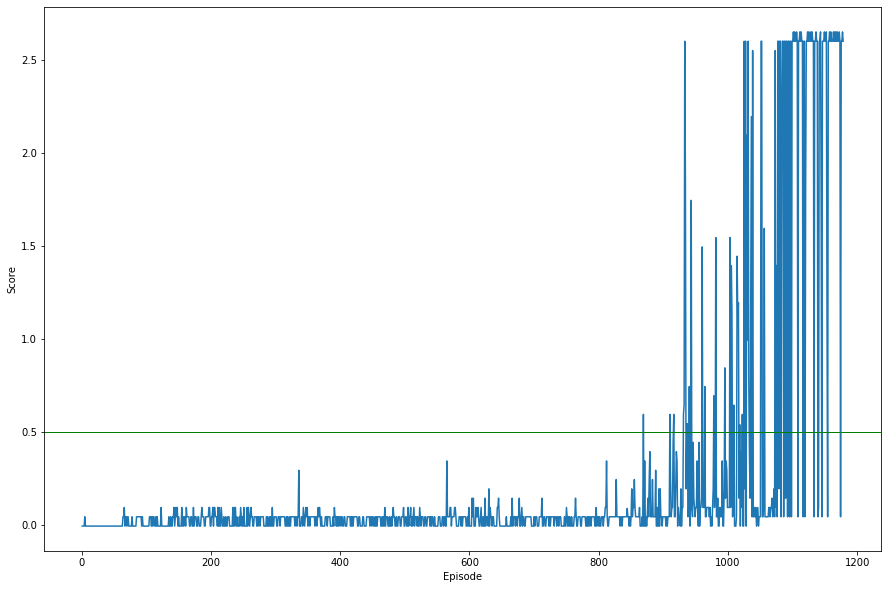

In [8]:
fig, ax = plt.subplots(1, 1, figsize=[15, 10])
ax.plot(np.arange(1, len(scores)+1), scores)
ax.set_ylabel('Score')
ax.set_xlabel('Episode')
ax.axhline(y=0.5, c="green", linewidth=1, linestyle='-')
plt.show()

### Using the saved model (weights)

In [9]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_best.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_best.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # Reset the environment with train_mode as False 
states = env_info.vector_observations
scores = np.zeros(num_agents)
while True:
    actions = agent.act(states)
    env_info = env.step(actions)[brain_name]
    next_states = env_info.vector_observations
    rewards = env_info.rewards
    dones = env_info.local_done
    scores += env_info.rewards
    states = next_states
    if np.any(dones):
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.8950000135228038


In [10]:
env.close()